In [1]:
# packages

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import tqdm
import os

from mtist import mtist_utils as mu
from mtist import infer_mtist as im
calculate_es_score = im.calculate_es_score

In [2]:
# get calculated scores for linear regression, and its regularized versions (with cross-validation), for geometric averaging

score_paths = ["test_mtist", "test_mtist2", "test_mtist_skl101", "test_mtist_skl0242"]
inf_methods = ["default", "ridge_CV", "lasso_CV", "elasticnet_CV"]

scores = []
for i in inf_methods:
    scores.append([])
    for j in score_paths:
        scores[-1].append(pd.read_csv(f"../../{j}/mtist/mtist1.0/mtist_datasets/{i}_inference_result/{i}_es_scores.csv", index_col=0).raw)

scores = np.array(scores)

scores_repo = []
for i in inf_methods:
    scores_repo.append(pd.read_csv(f"mtist_datasets/{i}_inference_result/{i}_es_scores.csv", index_col=0).raw)

# scores1 = pd.read_csv("../../test_mtist/mtist/mtist1.0/mtist_datasets/default_inference_result/default_es_scores.csv", index_col=0)
# scores2 = pd.read_csv("../../test_mtist2/mtist/mtist1.0/mtist_datasets/default_inference_result/default_es_scores.csv", index_col=0)
# scores3 = pd.read_csv("../../test_mtist_skl101/mtist/mtist1.0/mtist_datasets/default_inference_result/default_es_scores.csv", index_col=0)
# scores4 = pd.read_csv("../../test_mtist_skl0242/mtist/mtist1.0/mtist_datasets/default_inference_result/default_es_scores.csv", index_col=0)

# scores1 = pd.read_csv("mtist_datasets/lasso_CV_inference_result/lasso_CV_es_scores.csv", index_col=0)
# scores2 = pd.read_csv("mtist_datasets/lasso_CV_joao_inference_result/lasso_CV_joao_es_scores.csv", index_col=0)
# scores3 = pd.read_csv("mtist_datasets/lasso_CV_101_inference_result/lasso_CV_101_es_scores.csv", index_col=0)
# scores4 = pd.read_csv("mtist_datasets/lasso_CV_0242_inference_result/lasso_CV_0242_es_scores.csv", index_col=0)

# scores1 = pd.read_csv("mtist_datasets/ridge_CV_inference_result/ridge_CV_es_scores.csv", index_col=0)
# scores2 = pd.read_csv("mtist_datasets/ridge_CV_joao_inference_result/ridge_CV_joao_es_scores.csv", index_col=0)
# scores3 = pd.read_csv("mtist_datasets/ridge_CV_101_inference_result/ridge_CV_101_es_scores.csv", index_col=0)
# scores4 = pd.read_csv("mtist_datasets/ridge_CV_0242_inference_result/ridge_CV_0242_es_scores.csv", index_col=0)

# scores1 = pd.read_csv("mtist_datasets/elasticnet_CV_inference_result/elasticnet_CV_es_scores.csv", index_col=0)
# scores2 = pd.read_csv("mtist_datasets/elasticnet_CV_joao_inference_result/elasticnet_CV_joao_es_scores.csv", index_col=0)
# scores3 = pd.read_csv("mtist_datasets/elasticnet_CV_101_inference_result/elasticnet_CV_101_es_scores.csv", index_col=0)
# scores4 = pd.read_csv("mtist_datasets/elasticnet_CV_0242_inference_result/elasticnet_CV_0242_es_scores.csv", index_col=0)

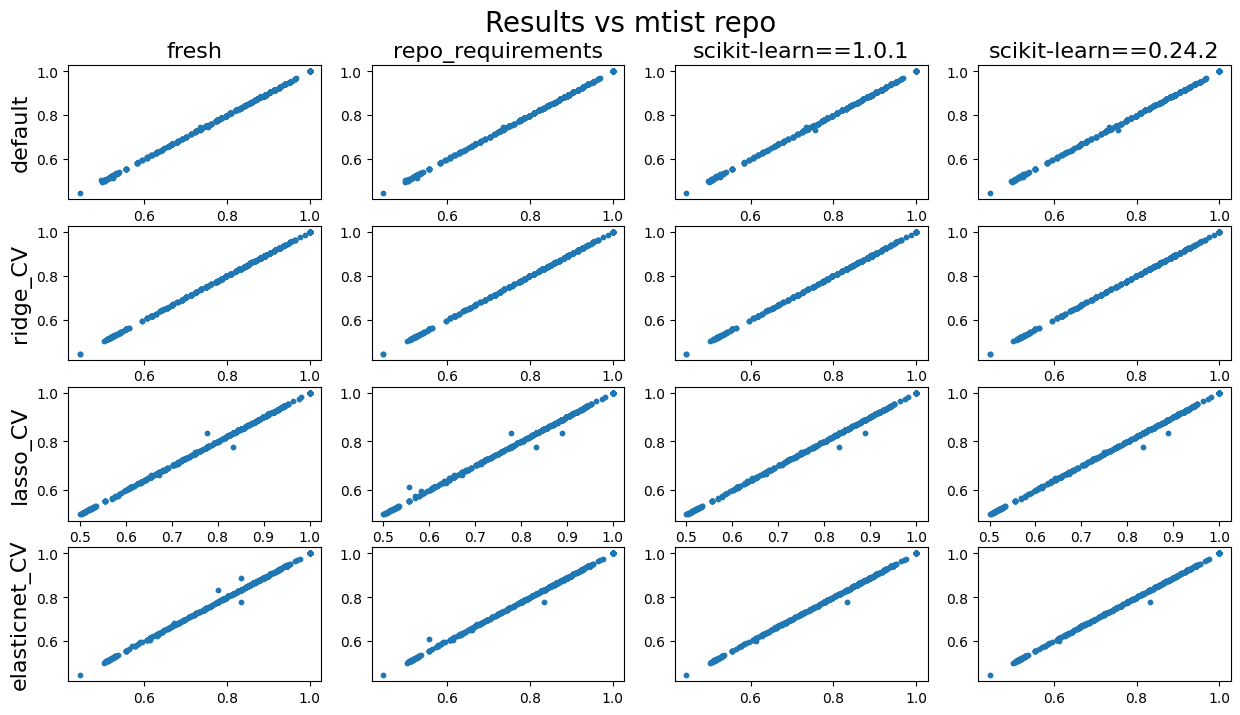

In [3]:
titles = ["fresh", "repo_requirements", "scikit-learn==1.0.1", "scikit-learn==0.24.2"]

plt.subplots(4, 4, figsize=(15,8))
for i in range(scores.shape[0]):
    for j in range(scores.shape[1]):
        plt.subplot(*scores.shape[:2], i*scores.shape[1]+j+1)
        plt.scatter(scores_repo[i], scores[i,j], s=10)
        if i == 0:
            plt.title(titles[j], fontsize=16)
        if j == 0:
            plt.ylabel(inf_methods[i], fontsize=16)

plt.suptitle("Results vs mtist repo", fontsize=20, y=0.95)
plt.show()

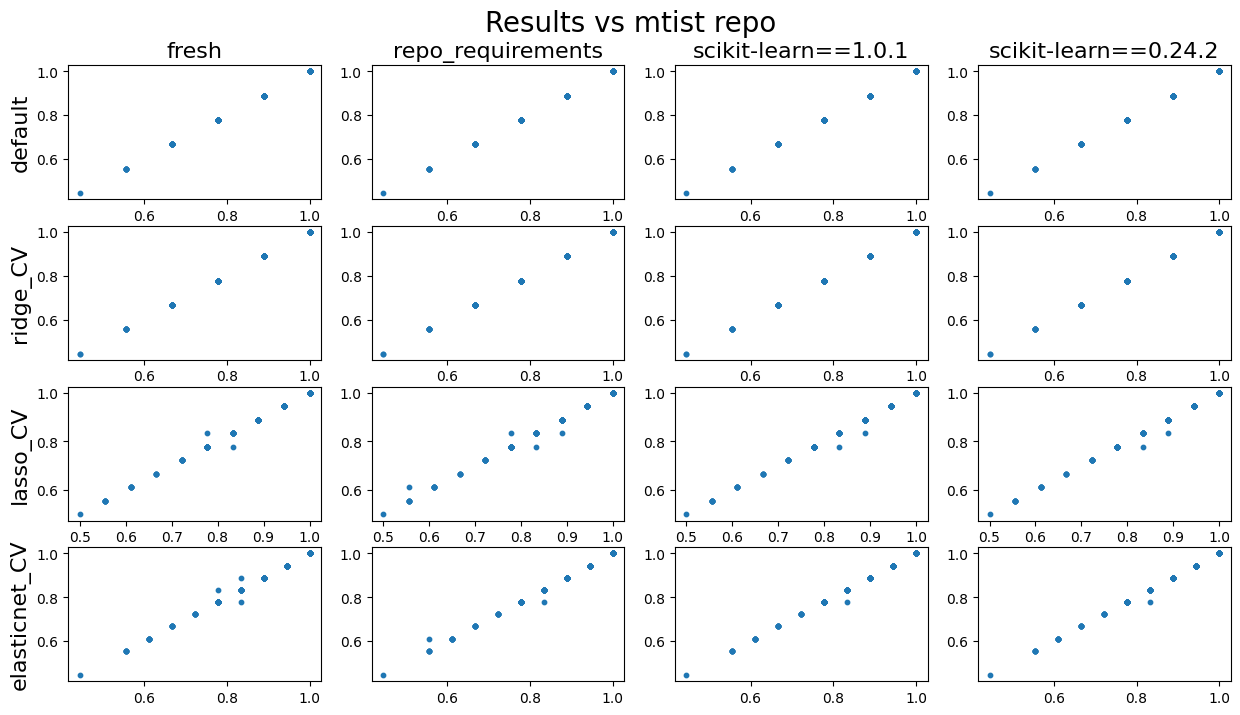

In [11]:
n_sp_list = []
for i in range(len([i for i in os.listdir("mtist_datasets") if "dataset_" in i])):
    n_sp_list.append(open(f"mtist_datasets/dataset_{i}.csv", "r").readlines()[0].count("species_"))

n_sp = 3
    
scores = []
for i in inf_methods:
    scores.append([])
    for j in score_paths:
        df = pd.read_csv(f"../../{j}/mtist/mtist1.0/mtist_datasets/{i}_inference_result/{i}_es_scores.csv", index_col=0)
        df["n_sp"] = n_sp_list
        scores[-1].append(df[df.n_sp==n_sp].raw)

scores = np.array(scores)

scores_repo = []
for i in inf_methods:
    df = pd.read_csv(f"mtist_datasets/{i}_inference_result/{i}_es_scores.csv", index_col=0)
    df["n_sp"] = n_sp_list
    scores_repo.append(df[df.n_sp==n_sp].raw)

plt.subplots(4, 4, figsize=(15,8))
for i in range(scores.shape[0]):
    for j in range(scores.shape[1]):
        plt.subplot(*scores.shape[:2], i*scores.shape[1]+j+1)
        plt.scatter(scores_repo[i], scores[i,j], s=10)
        if i == 0:
            plt.title(titles[j], fontsize=16)
        if j == 0:
            plt.ylabel(inf_methods[i], fontsize=16)

plt.suptitle("Results vs mtist repo", fontsize=20, y=0.95)
plt.show()

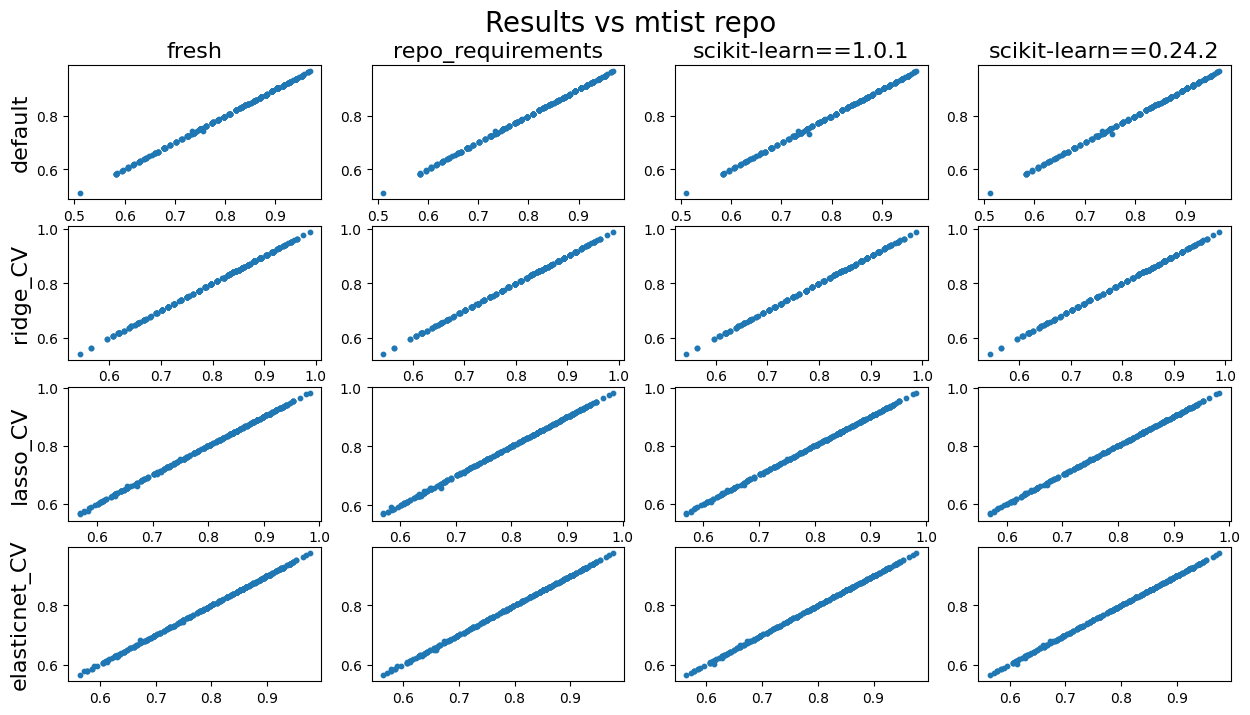

In [12]:
n_sp_list = []
for i in range(len([i for i in os.listdir("mtist_datasets") if "dataset_" in i])):
    n_sp_list.append(open(f"mtist_datasets/dataset_{i}.csv", "r").readlines()[0].count("species_"))

n_sp = 10
    
scores = []
for i in inf_methods:
    scores.append([])
    for j in score_paths:
        df = pd.read_csv(f"../../{j}/mtist/mtist1.0/mtist_datasets/{i}_inference_result/{i}_es_scores.csv", index_col=0)
        df["n_sp"] = n_sp_list
        scores[-1].append(df[df.n_sp==n_sp].raw)

scores = np.array(scores)

scores_repo = []
for i in inf_methods:
    df = pd.read_csv(f"mtist_datasets/{i}_inference_result/{i}_es_scores.csv", index_col=0)
    df["n_sp"] = n_sp_list
    scores_repo.append(df[df.n_sp==n_sp].raw)

plt.subplots(4, 4, figsize=(15,8))
for i in range(scores.shape[0]):
    for j in range(scores.shape[1]):
        plt.subplot(*scores.shape[:2], i*scores.shape[1]+j+1)
        plt.scatter(scores_repo[i], scores[i,j], s=10)
        if i == 0:
            plt.title(titles[j], fontsize=16)
        if j == 0:
            plt.ylabel(inf_methods[i], fontsize=16)

plt.suptitle("Results vs mtist repo", fontsize=20, y=0.95)
plt.show()

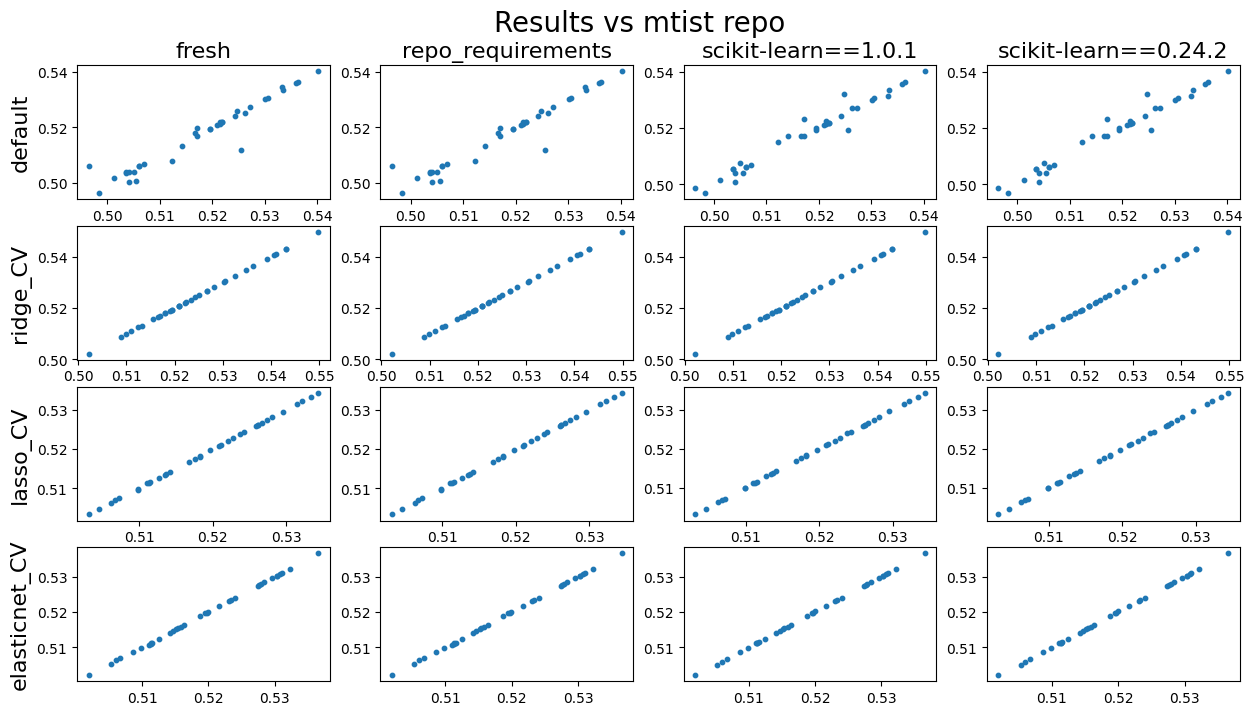

In [13]:
n_sp_list = []
for i in range(len([i for i in os.listdir("mtist_datasets") if "dataset_" in i])):
    n_sp_list.append(open(f"mtist_datasets/dataset_{i}.csv", "r").readlines()[0].count("species_"))

n_sp = 100
    
scores = []
for i in inf_methods:
    scores.append([])
    for j in score_paths:
        df = pd.read_csv(f"../../{j}/mtist/mtist1.0/mtist_datasets/{i}_inference_result/{i}_es_scores.csv", index_col=0)
        df["n_sp"] = n_sp_list
        scores[-1].append(df[df.n_sp==n_sp].raw)

scores = np.array(scores)

scores_repo = []
for i in inf_methods:
    df = pd.read_csv(f"mtist_datasets/{i}_inference_result/{i}_es_scores.csv", index_col=0)
    df["n_sp"] = n_sp_list
    scores_repo.append(df[df.n_sp==n_sp].raw)

plt.subplots(4, 4, figsize=(15,8))
for i in range(scores.shape[0]):
    for j in range(scores.shape[1]):
        plt.subplot(*scores.shape[:2], i*scores.shape[1]+j+1)
        plt.scatter(scores_repo[i], scores[i,j], s=10)
        if i == 0:
            plt.title(titles[j], fontsize=16)
        if j == 0:
            plt.ylabel(inf_methods[i], fontsize=16)

plt.suptitle("Results vs mtist repo", fontsize=20, y=0.95)
plt.show()

In [14]:
# get number of species of each dataset and add it to score dataframes

n_sp_list = []
for i in range(len(scores1)):
    n_sp_list.append(open(f"mtist_datasets/dataset_{i}.csv", "r").readlines()[0].count("species_"))

scores1["n_sp"] = n_sp_list
scores2["n_sp"] = n_sp_list
scores3["n_sp"] = n_sp_list
scores4["n_sp"] = n_sp_list

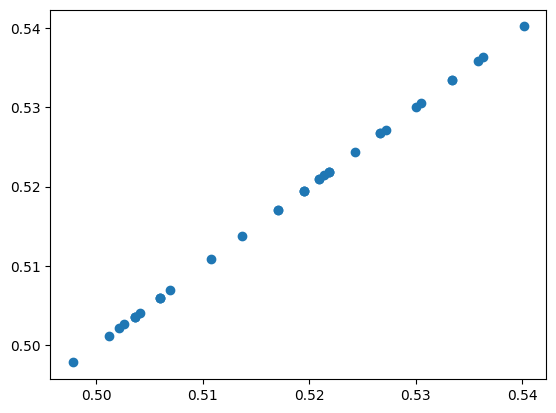

In [34]:
plt.scatter(scores4[scores4["n_sp"]==100].raw, scores3[scores3["n_sp"]==100].raw)

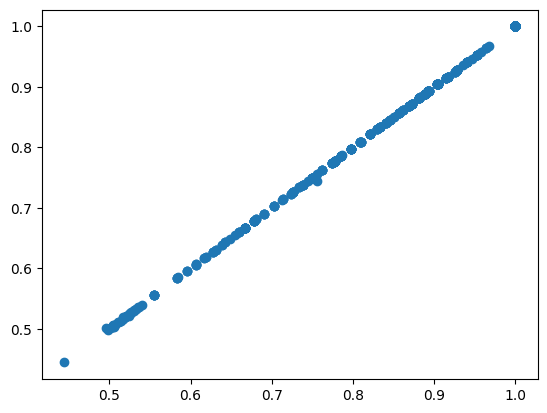

In [29]:
plt.scatter(scores1.raw, scores3.raw)

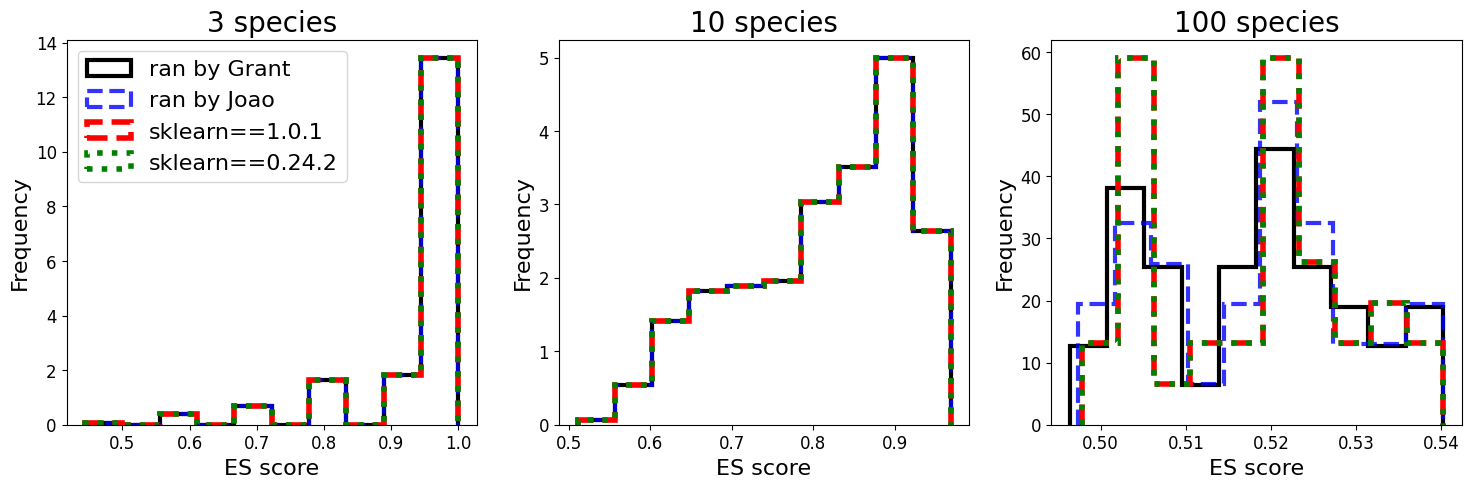

In [27]:
plt.subplots(1, 3, figsize=(18,5))
for i, n_sp in enumerate(np.sort(scores1["n_sp"].unique())):
    plt.subplot(1, 3, i+1)
    plt.hist(scores1[scores1["n_sp"]==n_sp]["raw"], 10, histtype="step", lw=3, color="k", density=True, label="ran by Grant", alpha=1)
    plt.hist(scores2[scores2["n_sp"]==n_sp]["raw"], 10, histtype="step", lw=3, color="b", ls="--", density=True, label="ran by Joao", alpha=0.8)
    plt.hist(scores3[scores3["n_sp"]==n_sp]["raw"], 10, histtype="step", lw=4, color="r", ls="dashed", density=True, label="sklearn==1.0.1")
    plt.hist(scores4[scores4["n_sp"]==n_sp]["raw"], 10, histtype="step", lw=4, color="g", ls="dotted", density=True, label="sklearn==0.24.2")
    if i==0:
        plt.legend(loc="upper left", fontsize=16)
    plt.title(f"{n_sp} species", fontsize=20)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel("ES score", fontsize=16)
    plt.ylabel("Frequency", fontsize=16)
plt.show()